# Binary Classification with a Bank Churn Dataset

Bu çalışmada bankadan ayrılan müşterileri tahmin eden sınıflandırma modeli geliştirilmektedir.

Bu projede kullanılan veriler [buradan](https://www.kaggle.com/c/playground-series-s4e1/data) temin edilmiştir.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
df.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

In [5]:
df["CustomerId"].value_counts().head()

CustomerId
15682355    121
15570194     99
15585835     98
15595588     91
15648067     90
Name: count, dtype: int64

In [7]:
df[df["CustomerId"]==15570194]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
752,752,15570194,Hsueh,707,France,Female,53.0,5,0.00,2,1.0,0.0,70778.61,1
1766,1766,15570194,Trevisano,661,France,Female,44.0,7,0.00,1,1.0,0.0,171060.01,0
2741,2741,15570194,Hsia,554,France,Male,38.0,10,0.00,2,1.0,0.0,139435.44,0
5234,5234,15570194,Pinto,726,Spain,Male,32.0,6,0.00,2,1.0,0.0,85890.78,0
5695,5695,15570194,Trevisano,681,France,Male,44.0,7,0.00,1,0.0,0.0,143981.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151414,151414,15570194,Trevisani,502,France,Male,47.0,9,0.00,2,1.0,1.0,79259.77,0
152507,152507,15570194,Nnamutaezinwa,628,Germany,Female,33.0,2,89025.09,2,1.0,1.0,51553.97,0
156764,156764,15570194,Pirozzi,762,France,Female,35.0,7,61636.97,1,1.0,1.0,82336.73,0
160615,160615,15570194,Ikemefuna,635,France,Male,29.0,5,0.00,2,0.0,1.0,12510.53,0


In [8]:
df["Geography"].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [9]:
d_Geo={"France":2, "Spain":1, "Germany":0}
df["Geography"]=df["Geography"].map(d_Geo)
df["Gender"]=np.where(df["Gender"]=="Male", 1, 0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  int64  
 5   Gender           165034 non-null  int32  
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int32(1), int64(7), object(1)
memory usage: 17.0+ MB


In [11]:
df["Exited"].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

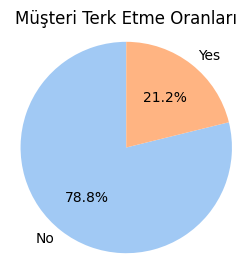

In [12]:
plt.figure(figsize=(3,3))
sns.set_palette('pastel')
plt.pie(df["Exited"].value_counts(), labels=["No", "Yes"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Müşteri Terk Etme Oranları')
plt.show()

## Modelleme

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

def algo_test(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1), confusion_matrix(y_test, tahmin)

In [15]:
x=df.drop(["id", "CustomerId", "Surname", "Exited"], axis=1)
y=df[["Exited"]]

In [16]:
# Verilerdeki dengesizliği giderelim
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
x, y = oversample.fit_resample(x, y)

In [18]:
x.shape, y.shape

((260226, 10), (260226, 1))

In [24]:
result, cm = algo_test(x,y)

Veriler hazır modeller deneniyor
GaussianNB()  modeli eğitiliyor!..
[[29015  9924]
 [10218 28911]]
BernoulliNB()  modeli eğitiliyor!..


C:\Users\Abdullatif\miniconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abdullatif\miniconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[26905 12034]
 [12986 26143]]
LogisticRegression()  modeli eğitiliyor!..


C:\Users\Abdullatif\miniconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abdullatif\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[27713 11226]
 [10738 28391]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[33191  5748]
 [ 5384 33745]]
RandomForestClassifier()  modeli eğitiliyor!..


C:\Users\Abdullatif\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[35587  3352]
 [ 4735 34394]]
GradientBoostingClassifier()  modeli eğitiliyor!..


C:\Users\Abdullatif\miniconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[35152  3787]
 [ 4935 34194]]
KNeighborsClassifier()  modeli eğitiliyor!..


C:\Users\Abdullatif\miniconda3\envs\tf\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Abdullatif\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[24605 14334]
 [ 8700 30429]]
Eğitim tamamlandı.
En başarılı model:  RandomForestClassifier
Confusion Matrix:
[[35587  3352]
 [ 4735 34394]]
classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     38939
           1       0.91      0.88      0.89     39129

    accuracy                           0.90     78068
   macro avg       0.90      0.90      0.90     78068
weighted avg       0.90      0.90      0.90     78068

Diğer Modeller:


In [26]:
result

,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.896411,0.896411,0.896411,0.896411
GradientBoostingClassifier,0.888277,0.888277,0.888277,0.888277
DecisionTreeClassifier,0.857406,0.857406,0.857406,0.857406
GaussianNB,0.741994,0.741994,0.741994,0.741994
LogisticRegression,0.718656,0.718656,0.718656,0.718656
KNeighborsClassifier,0.704950,0.704950,0.704950,0.704950
BernoulliNB,0.679510,0.679510,0.679510,0.679510


<Axes: >

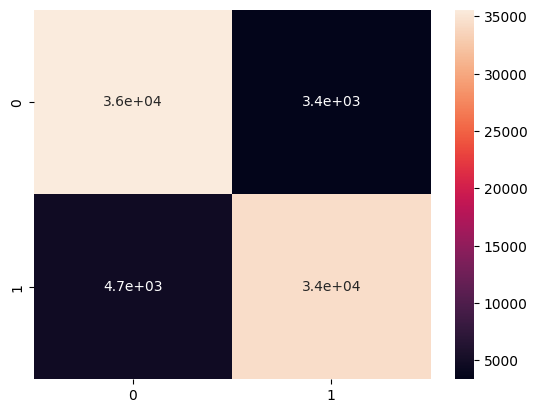

In [33]:
sns.heatmap(cm, annot=True)

In [34]:
rf = RandomForestClassifier()
model = rf.fit(x,y)

In [35]:
test=pd.read_csv("test.csv")
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [36]:
test["Geography"]=test["Geography"].map(d_Geo)
test["Gender"]=np.where(test["Gender"]=="Male", 1, 0)

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  int64  
 5   Gender           110023 non-null  int32  
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int32(1), int64(6), object(1)
memory usage: 10.5+ MB


In [39]:
xt=test.drop(["id", "CustomerId", "Surname"], axis=1)

In [40]:
pred=model.predict(xt)

In [42]:
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
test["Exited"]=pred

In [44]:
sm=pd.read_csv("sample_submission.csv")
sm.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [45]:
test[["id", "Exited"]].to_csv("submition.csv", index=False)

## Sonuç

Bu çalışmada bankadan ayrılan müşterileri tahmin eden sınıflandırma modelleri geliştirilmiştir. En yüksek başarı yaklaşık %90 ile `RandomForestClassifier` modelinde görülmüştür.